In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import pickle
import seaborn as sns

Notes from spatial analysis section:

LST histogram, cloud coverage and when maybe, 
One by histogram, each city has a colored line, statistical outliers

All data analysis. General properties of the dataset

In [2]:
dataset_root = '/glade/derecho/scratch/jstarfeldt/urban_heat_dataset'

In [3]:
cities = [
    'Jacksonville', 'DMV', 'NYC', 'Phoenix', 'Miami', 'Chicago', 'Denver', 'Seattle', 'San_Francisco', 'Los_Angeles', 'Atlanta', 'Toronto',
    'Mexico_City', 'Las_Vegas', 'Salt_Lake_City', 'Dallas', 'Houston', 'New_Orleans', 'St_Louis', 'Minneapolis',
    'Charlotte', 'Philadelphia', 'San_Diego', 'San_Juan', 'Montreal', 'Guadalajara', 'Monterrey', 'Cancun', 'Billings', 'Guatemala_City',
    'San_Jose', 'Havana', 'Santo_Domingo', 'Tegucigalpa', 'Managua', 'Panama_City', 'Bogota', 'Lima', 'Quito', 'Santiago', 'Buenos_Aires',
    'Sao_Paulo', 'Manaus', 'Punta_Arenas', 'La_Paz', 'Montevideo', 'Brasilia', 'Caracas'
]
cities = sorted(cities)

In [4]:
city = 'Atlanta'
city_list = sorted(glob.glob(f'{dataset_root}/{city}/processed_Landsat/*'))
#city_list

In [5]:
ds = xr.open_dataset(city_list[0])
ds

<xarray.Dataset> Size: 936MB
Dimensions:                    (y: 3000, x: 3000)
Coordinates:
  * x                          (x) float64 24kB 7.031e+05 ... 7.931e+05
  * y                          (y) float64 24kB 3.698e+06 ... 3.788e+06
    datetime                   object 8B ...
Data variables: (12/14)
    Landsat_cloud_mask         (y, x) object 72MB ...
    Landsat_blue_reflectance   (y, x) float64 72MB ...
    Landsat_green_reflectance  (y, x) float64 72MB ...
    Landsat_red_reflectance    (y, x) float64 72MB ...
    Landsat_NIR_reflectance    (y, x) float64 72MB ...
    Landsat_SWIR1_reflectance  (y, x) float64 72MB ...
    ...                         ...
    Sentinel1_VV               (y, x) float64 72MB ...
    Sentinel1_VH               (y, x) float64 72MB ...
    Sentinel1_HH               (y, x) float64 72MB ...
    Sentinel1_HV               (y, x) float64 72MB ...
    Sentinel1_angle            (y, x) float64 72MB ...
    spatial_ref                int32 4B ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
from datetime import datetime

In [7]:
date_dict = {string: [] for string in cities}
date_str_dict = {string: [] for string in cities}

In [8]:
format_string = "%Y%m%d%H%M"

for city in cities:
    #print(city)
    city_list = sorted(glob.glob(f'{dataset_root}/{city}/processed_Landsat/*'))
    for file in city_list:
        #print(file)
        dt_str = file.split('_')[-1].split('.')[0]
        dt = datetime.strptime(dt_str, format_string)
        date_dict[city].append(dt)
        date_str_dict[city].append(dt_str[:8])

In [16]:
city_data = []

for city in cities:
    print(city)
    city_list = glob.glob(f'{dataset_root}/{city}/processed_Landsat/*')
    for file in city_list:
        data = xr.open_dataset(file)['Landsat_LST'].values
        city_data.append(np.nanmedian(data))

Atlanta
Billings
Bogota
Brasilia
Buenos_Aires
Cancun
Caracas
Charlotte
Chicago
DMV
Dallas
Denver
Guadalajara
Guatemala_City
Havana
Houston
Jacksonville
La_Paz
Las_Vegas
Lima
Los_Angeles
Managua
Manaus
Mexico_City
Miami
Minneapolis
Monterrey
Montevideo
Montreal
NYC
New_Orleans
Panama_City
Philadelphia
Phoenix
Punta_Arenas
Quito
Salt_Lake_City
San_Diego
San_Francisco
San_Jose
San_Juan
Santiago
Santo_Domingo
Sao_Paulo
Seattle
St_Louis
Tegucigalpa
Toronto


In [ ]:
city_data = []

for city in cities:
    print(city)
    city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
    for file in city_list:
        data = xr.open_dataset(file)['Landsat_LST'].values
        city_data.append(np.nanmedian(data))

In [17]:
with open('/glade/derecho/scratch/jstarfeldt/all_LSTs.pkl', 'wb') as file:
    pickle.dump(city_data, file)

In [7]:
with open('/glade/derecho/scratch/jstarfeldt/all_LSTs.pkl', 'rb') as file:
    city_data = pickle.load(file)

In [8]:
med_LST_dict = {}
i = 0
for city in cities:
    num = len(date_str_dict[city])
    med_LST_dict[city] = city_data[i:i+num]
    i += num

In [9]:
# Sort the dictionary by the sum of its array values
sorted_data = dict(sorted(med_LST_dict.items(), key=lambda item: np.mean(item[1]), reverse=True))

Phoenix
Las_Vegas
Guadalajara
Miami
Monterrey
San_Diego
Los_Angeles
Brasilia
Mexico_City
Dallas
Tegucigalpa
Lima
Cancun
Houston
Havana
San_Francisco
Santo_Domingo
Billings
La_Paz
Jacksonville
Managua
Santiago
Buenos_Aires
Charlotte
Denver
San_Juan
Guatemala_City
Atlanta
New_Orleans
Montevideo
Sao_Paulo
Caracas
Montreal
St_Louis
Salt_Lake_City
Philadelphia
DMV
Seattle
Quito
NYC
Minneapolis
Chicago
Toronto
Bogota
Punta_Arenas
San_Jose
Panama_City
Manaus


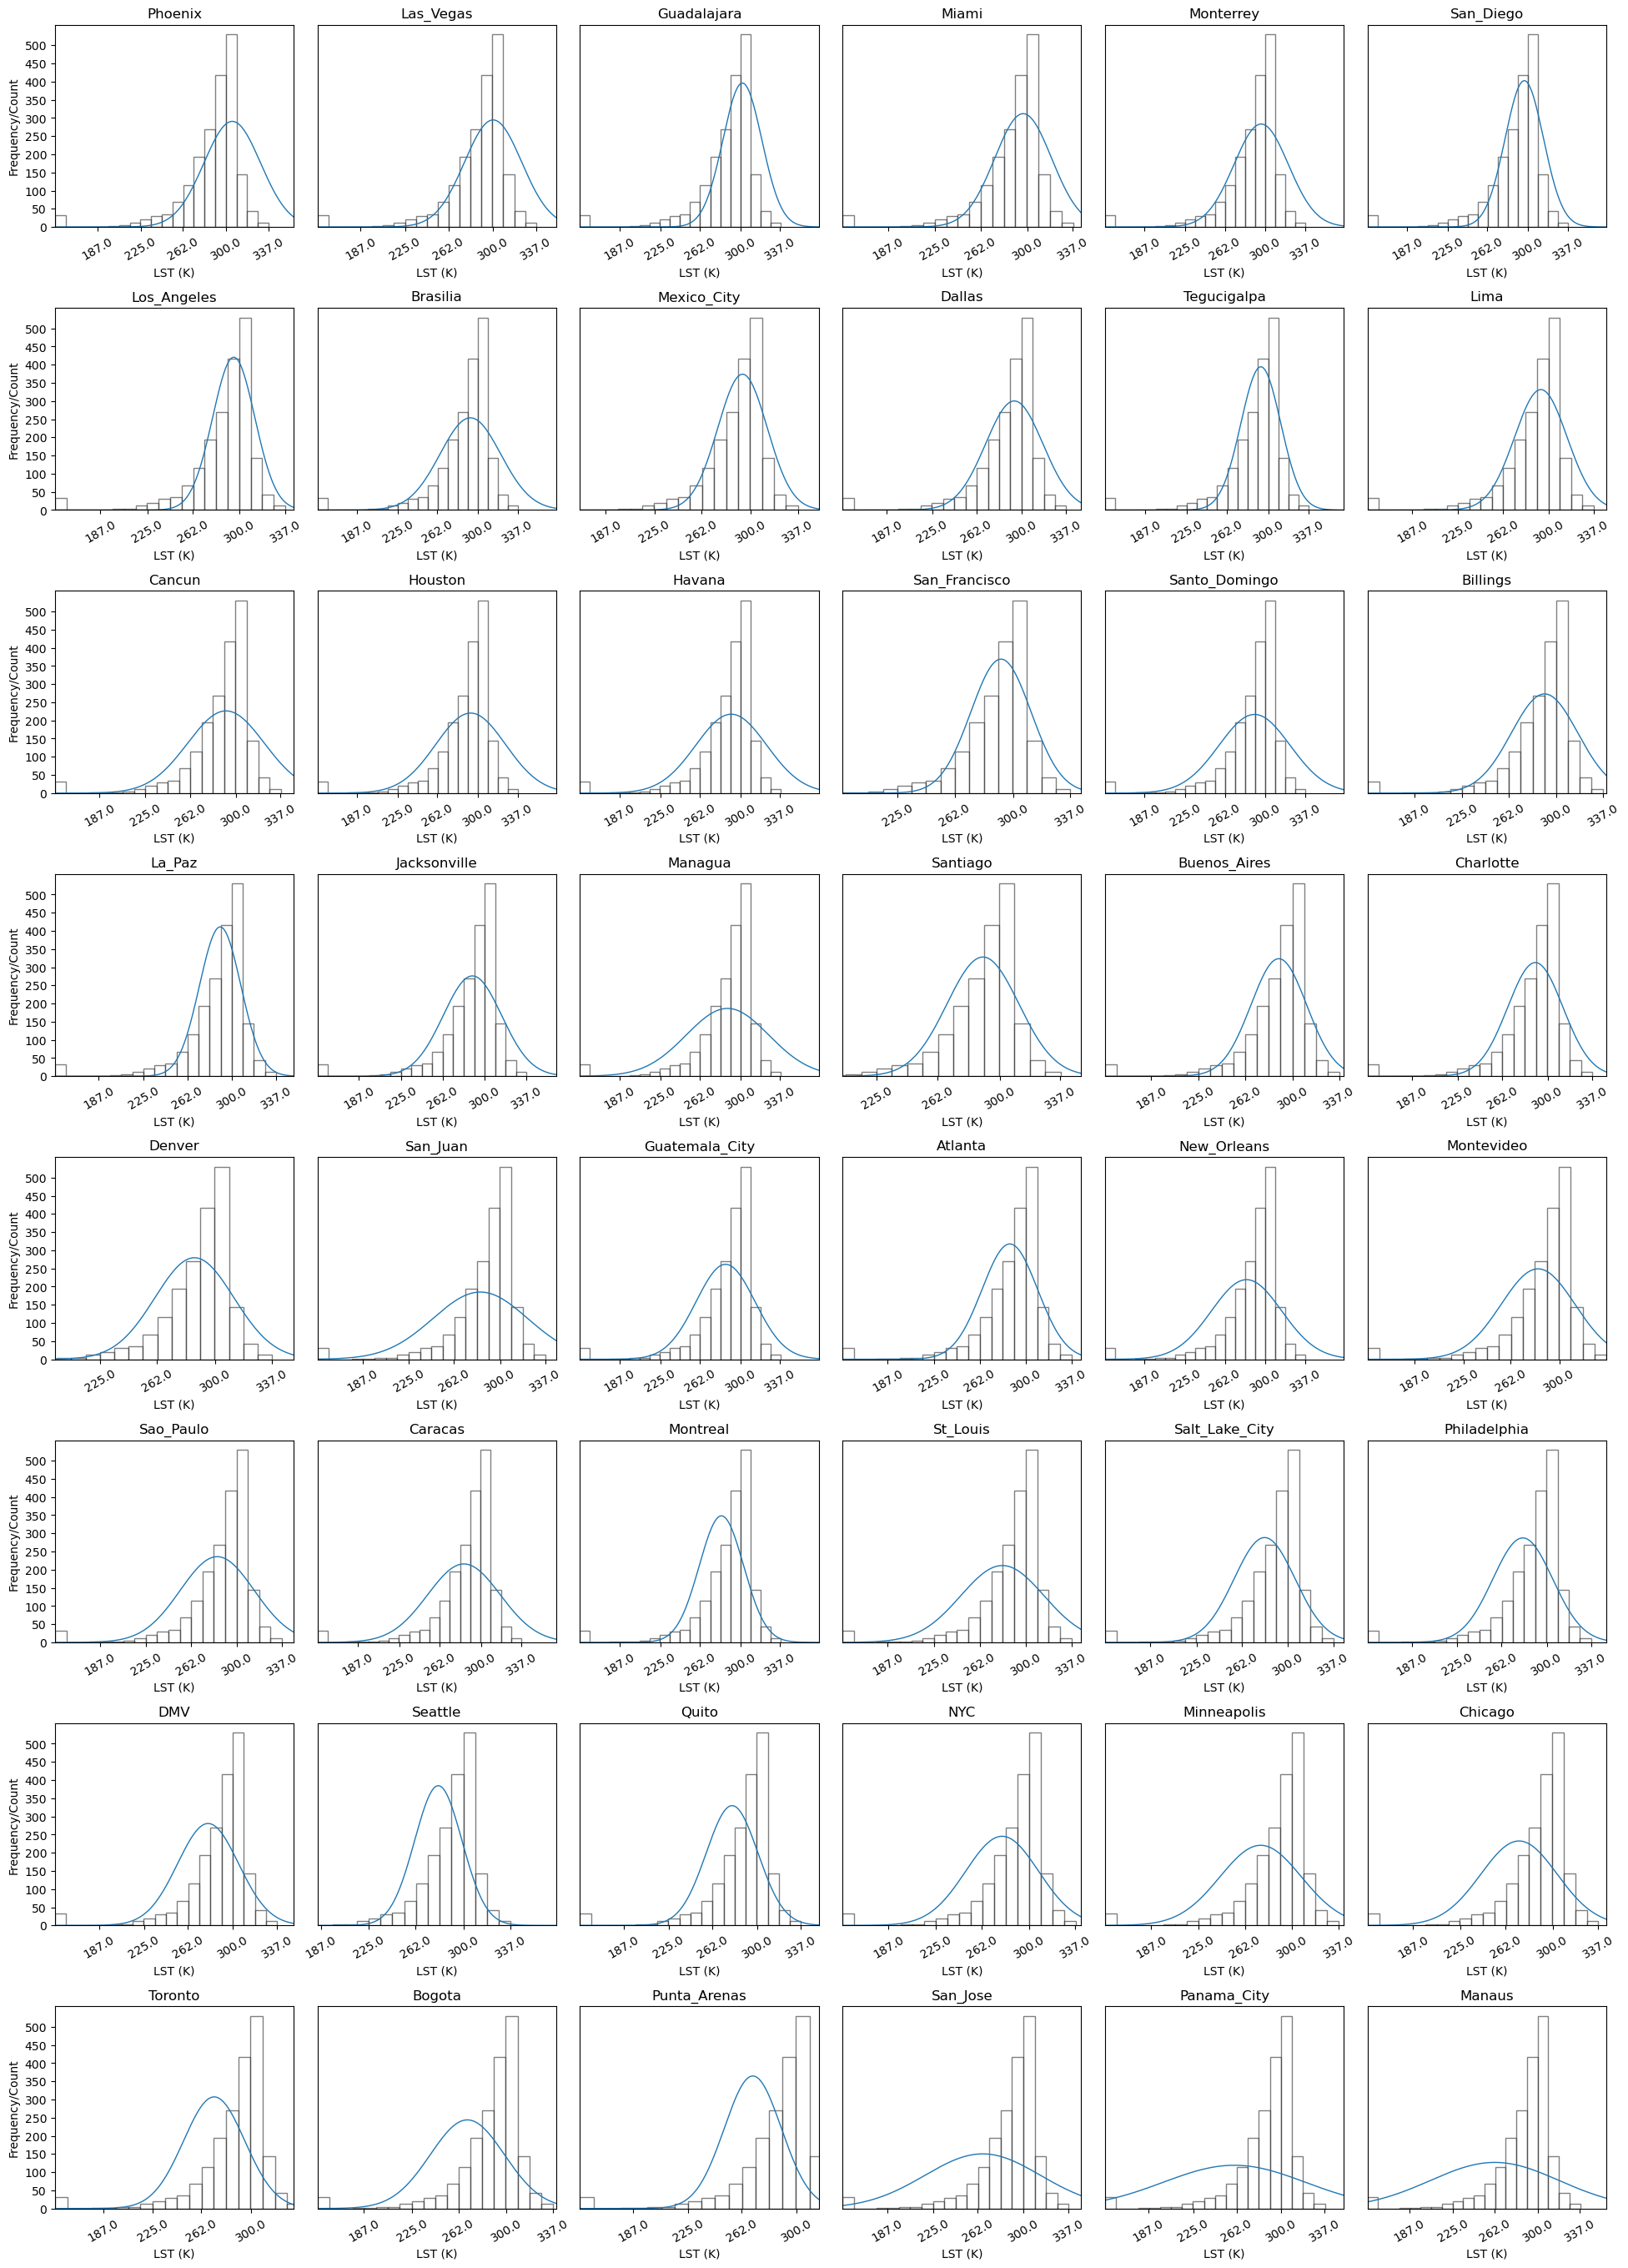

In [22]:
counts, bin_edges = np.histogram(city_data, bins=20)
area = np.sum(counts*(np.nanmax(city_data)-np.nanmin(city_data))/20)
sorted_cities = list(sorted_data.keys())

fig, axs = plt.subplots(8, 6)
fig.set_size_inches(24, 34)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.subplots_adjust(hspace=0.4, wspace=0.1)
colors = cm.jet(np.linspace(0, 1, 48))

#box.plot(date_dict[cities[i]], cloud_dict[cities[i]], color=colors[i])
#box.set_xticks(date_dict[cities[i]][::4], labels=date_str_dict[cities[i]][::4], rotation=45)
#box.set_yticks(np.arange(0,1.01,0.2))
        
i = 0
for ax in axs:
    for box in ax:
        city = sorted_cities[i]
        print(city)
        arrs = []
        city_list = glob.glob(f'{dataset_root}/{city}/processed_Landsat/*')
        for file in city_list:
            data = xr.open_dataset(file)['Landsat_LST'].values
            arrs.append(data)
        
        data = np.stack(arrs)
        
        mean = np.nanmean(data)
        std_dev = np.nanstd(data)
        x = np.linspace(np.nanmin(data), np.nanmax(data), 1000)
        pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
        
        # Plot the line
        #box.vlines(x=[mean-std_dev, mean-2*std_dev, mean+std_dev, mean+2*std_dev], ymin=0, ymax=np.max(counts), colors='r',
         #          linewidth=1, linestyles='dashed')
        box.hist(city_data, bins=20, alpha=0.5, color='white', edgecolor='black')
        box.plot(x, pdf * area, linewidth=1)
        box.set_xticks(np.round(bin_edges)[::4], labels=np.round(bin_edges)[::4], rotation=30)
        box.set_xlabel('LST (K)')
        box.set_xlim(left=np.min(x), right=np.max(x))
        if i % 6 == 0:
            box.set_yticks(np.arange(0,np.max(counts)+1,50))
            box.set_ylabel('Frequency/Count')
        box.set_title(city)
        i += 1

#plt.hist(city_data, bins=20, alpha=0.5, color='white', edgecolor='black')
#fig.suptitle('Histogram of Median LST by File and PDFs of LST for Each City')
#plt.xlabel('LST (K)')
#plt.ylabel('Frequency/Count')
#plt.legend(cities, loc='upper left')
plt.show()

In [18]:
cloud = ds['Landsat_cloud_mask'].values
cloud

array([[           nan,            nan,            nan, ...,
        1.01010100e+14, 1.01010100e+14, 1.01011010e+14],
       [           nan,            nan,            nan, ...,
        1.01011100e+14, 1.01011010e+14, 1.01011100e+14],
       [           nan,            nan,            nan, ...,
        1.01011000e+14, 1.01011100e+14, 1.01011100e+14],
       ...,
       [           nan,            nan,            nan, ...,
        1.01010111e+14, 1.01010111e+14, 1.01010111e+14],
       [           nan,            nan,            nan, ...,
        1.01010111e+14, 1.01010111e+14, 1.01010111e+14],
       [           nan,            nan,            nan, ...,
        1.01010111e+14, 1.01010111e+14, 1.01010111e+14]],
      shape=(3000, 3000))

In [8]:
def index(val):
    try:
        return (str(int(val))[-4] == '1')
    except:
        return False

func = np.vectorize(index)

In [19]:
mask = func(cloud)
mask

/glade/u/home/jstarfeldt/.conda/envs/heat/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2625: RuntimeWarning: invalid value encountered in index (vectorized)
  outputs = ufunc(*args, out=...)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(3000, 3000))

In [23]:
def index(bit):
    if type(bit) == str:
        if bit == 'nan':
            return False
        else:
            return str(int(float(bit)))[-4] == '1'
    else:
        if np.isnan(bit):
            return False
        else:
            return str(int(bit))[-4] == '1'

func = np.vectorize(index)

In [9]:
cloud_dict = {string: [] for string in cities}
cloud_dict

{'Atlanta': [],
 'Billings': [],
 'Bogota': [],
 'Brasilia': [],
 'Buenos_Aires': [],
 'Cancun': [],
 'Caracas': [],
 'Charlotte': [],
 'Chicago': [],
 'DMV': [],
 'Dallas': [],
 'Denver': [],
 'Guadalajara': [],
 'Guatemala_City': [],
 'Havana': [],
 'Houston': [],
 'Jacksonville': [],
 'La_Paz': [],
 'Las_Vegas': [],
 'Lima': [],
 'Los_Angeles': [],
 'Managua': [],
 'Manaus': [],
 'Mexico_City': [],
 'Miami': [],
 'Minneapolis': [],
 'Monterrey': [],
 'Montevideo': [],
 'Montreal': [],
 'NYC': [],
 'New_Orleans': [],
 'Panama_City': [],
 'Philadelphia': [],
 'Phoenix': [],
 'Punta_Arenas': [],
 'Quito': [],
 'Salt_Lake_City': [],
 'San_Diego': [],
 'San_Francisco': [],
 'San_Jose': [],
 'San_Juan': [],
 'Santiago': [],
 'Santo_Domingo': [],
 'Sao_Paulo': [],
 'Seattle': [],
 'St_Louis': [],
 'Tegucigalpa': [],
 'Toronto': []}

In [9]:
import warnings

In [11]:
#city_data = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for city in cities:
        print(city)
        city_list = glob.glob(f'{dataset_root}/{city}/processed_Landsat/*')
        for file in city_list:
            #print(file)
            data = xr.open_dataset(file)['Landsat_cloud_mask'].values
            pixels = np.sum(np.where(np.nan_to_num(data) == 0, 0, 1))
            cloud = func(data)
            cloud_frac = np.sum(cloud)/pixels
            #city_data.append(cloud_frac)
            cloud_dict[city].append(cloud_frac)
    
    city_data = sum(cloud_dict.values(), [])

Atlanta
Billings
Bogota
Brasilia
Buenos_Aires
Cancun
Caracas
Charlotte
Chicago
DMV
Dallas
Denver
Guadalajara
Guatemala_City
Havana
Houston
Jacksonville
La_Paz
Las_Vegas
Lima
Los_Angeles
Managua
Manaus
Mexico_City
Miami
Minneapolis
Monterrey
Montevideo
Montreal
NYC
New_Orleans
Panama_City
Philadelphia
Phoenix
Punta_Arenas
Quito
Salt_Lake_City
San_Diego
San_Francisco
San_Jose
San_Juan
Santiago
Santo_Domingo
Sao_Paulo
Seattle
St_Louis
Tegucigalpa
Toronto


In [12]:
with open('/glade/derecho/scratch/jstarfeldt/all_cloud_fracs.pkl', 'wb') as file:
    pickle.dump(city_data, file)
with open('/glade/derecho/scratch/jstarfeldt/all_cloud_dicts.pkl', 'wb') as file:
    pickle.dump(cloud_dict, file)

In [9]:
with open('/glade/derecho/scratch/jstarfeldt/all_cloud_fracs.pkl', 'rb') as file:
    city_data = pickle.load(file)
with open('/glade/derecho/scratch/jstarfeldt/all_cloud_dicts.pkl', 'rb') as file:
    cloud_dict = pickle.load(file)

In [11]:
# Sort the dictionary by the sum of its array values
sorted_data = dict(sorted(cloud_dict.items(), key=lambda item: np.mean(item[1]), reverse=True))

Jacksonville
DMV
NYC
Phoenix
Miami
Chicago
Denver
Seattle
San_Francisco
Los_Angeles
Atlanta
Toronto
Mexico_City
Las_Vegas
Salt_Lake_City
Dallas
Houston
New_Orleans
St_Louis
Minneapolis
Charlotte
Philadelphia
San_Diego
San_Juan
Montreal
Guadalajara
Monterrey
Cancun
Billings
Guatemala_City
San_Jose
Havana
Santo_Domingo
Tegucigalpa
Managua
Panama_City
Bogota
Lima
Quito
Santiago
Buenos_Aires
Sao_Paulo
Manaus
Punta_Arenas
La_Paz
Montevideo
Brasilia
Caracas


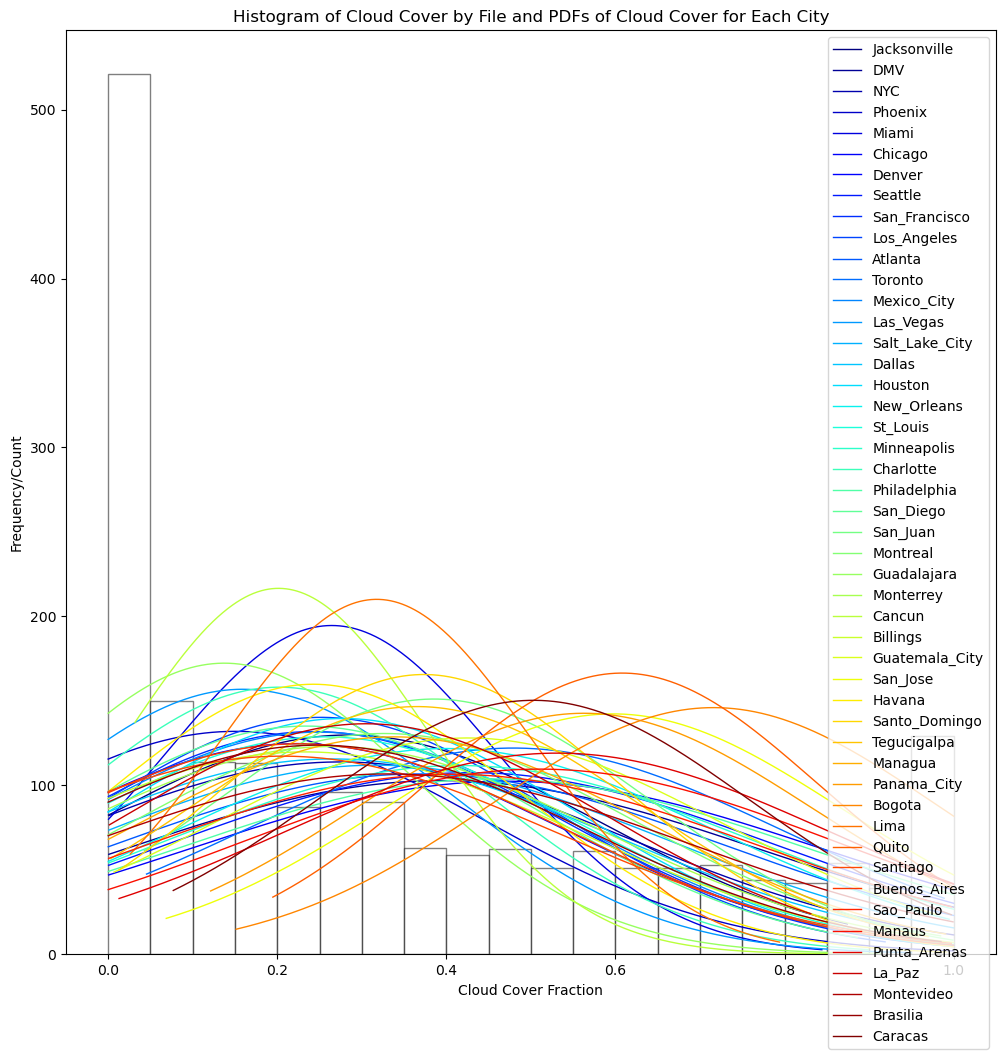

In [97]:
fig = plt.figure(figsize=(12, 12))
colors = cm.jet(np.linspace(0, 1, 48))
counts, bin_edges = np.histogram(city_data, bins=20)
area = np.sum(counts*(np.nanmax(city_data)-np.nanmin(city_data))/20)
sorted_cities = list(sorted_data.keys())

i = 0
for city in cities:
    print(city)
    data = cloud_dict[city]
    
    mean = np.nanmean(data)
    std_dev = np.nanstd(data)
    x = np.linspace(np.nanmin(data), np.nanmax(data), 1000)
    pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
    
    # Plot the line
    plt.plot(x, pdf * area, color=colors[i], linewidth=1)
    i += 1
    #if i > 5:
    #    break

plt.hist(city_data, bins=20, alpha=0.5, color='white', edgecolor='black')
plt.title('Histogram of Cloud Cover by File and PDFs of Cloud Cover for Each City')
plt.xlabel('Cloud Cover Fraction')
plt.ylabel('Frequency/Count')
plt.legend(cities, loc='upper right')
plt.show()

In [14]:
sorted_data.keys()

dict_keys(['Bogota', 'Quito', 'San_Jose', 'Panama_City', 'Punta_Arenas', 'Manaus', 'Caracas', 'Toronto', 'Chicago', 'Philadelphia', 'Seattle', 'Guatemala_City', 'Minneapolis', 'DMV', 'Sao_Paulo', 'New_Orleans', 'San_Juan', 'Santo_Domingo', 'Atlanta', 'Tegucigalpa', 'Managua', 'Montevideo', 'Montreal', 'Lima', 'Salt_Lake_City', 'Jacksonville', 'La_Paz', 'Houston', 'NYC', 'Dallas', 'Monterrey', 'Miami', 'St_Louis', 'Los_Angeles', 'Mexico_City', 'Brasilia', 'San_Francisco', 'Havana', 'San_Diego', 'Billings', 'Cancun', 'Buenos_Aires', 'Denver', 'Santiago', 'Charlotte', 'Las_Vegas', 'Phoenix', 'Guadalajara'])

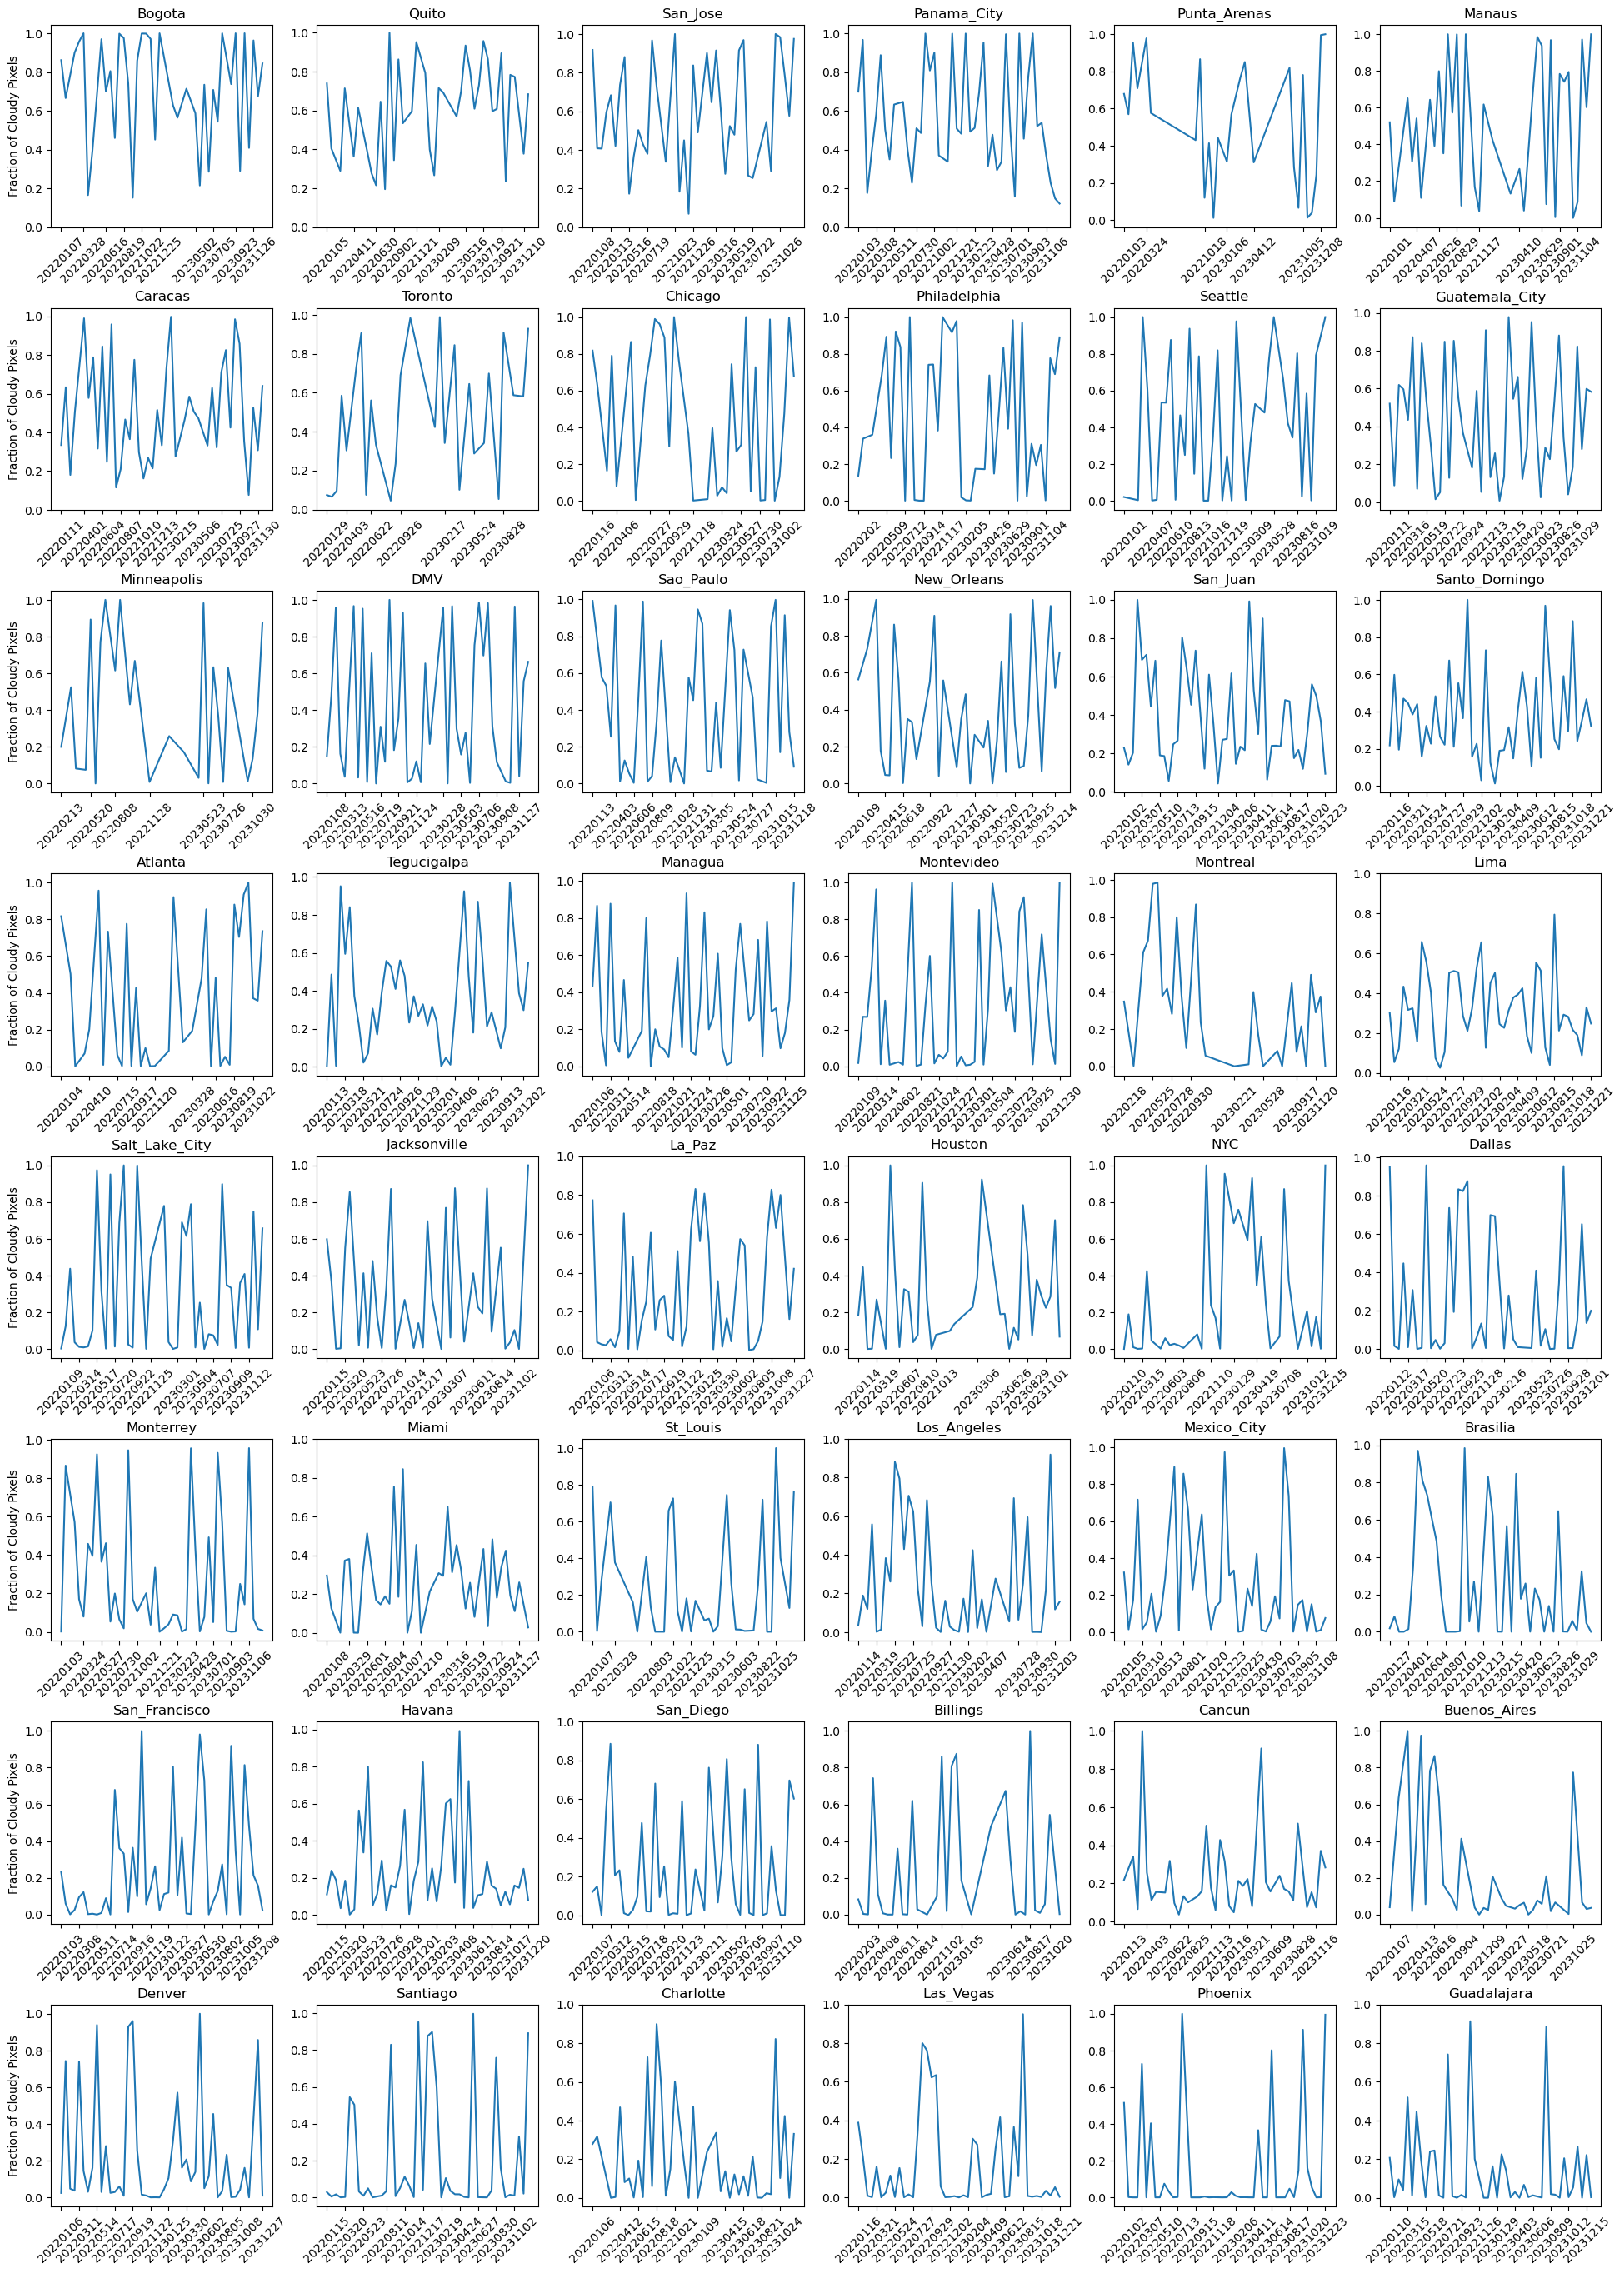

In [25]:
fig, axs = plt.subplots(8, 6)
fig.set_size_inches(24, 34)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.subplots_adjust(hspace=0.4)
colors = cm.jet(np.linspace(0, 1, 48))
sorted_cities = list(sorted_data.keys())

i = 0
for ax in axs:
    for box in ax:
        city = sorted_cities[i]
        box.plot(date_dict[city], cloud_dict[city])
        box.set_xticks(date_dict[city][::4], labels=date_str_dict[city][::4], rotation=45)
        box.set_yticks(np.arange(0,1.01,0.2))
        box.set_title(city)
        if i % 6 == 0:
            box.set_ylabel('Fraction of Cloudy Pixels')
        i += 1

## Variable Correlation

In [38]:
def calculate_corr_matrix(file):
    ds = xr.open_dataset(file)
    arr = ds[['Landsat_blue_reflectance', 'Landsat_green_reflectance', 'Landsat_red_reflectance', 'Landsat_NIR_reflectance',
          'Landsat_SWIR1_reflectance', 'Landsat_SWIR2_reflectance', 'Landsat_LST', 'Sentinel1_VV', 'Sentinel1_VH']]\
        .to_dataarray().values.reshape((9,-1))

    nan_columns = np.isnan(arr).any(axis=0) # Identify columns with NaNs
    filtered_array = arr[:, ~nan_columns] # Filter out columns with NaN

    return np.corrcoef(filtered_array)

In [39]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for city in cities:
        corr_matrices = []
        city_list = sorted(glob.glob(f'{dataset_root}/{city}/processed_Landsat/*'))
        
        for file in city_list:
            corr_matrices.append(calculate_corr_matrix(file))
    
        corr_matrix = np.nanmean(corr_matrices, axis=0)
        with open(f'/glade/derecho/scratch/jstarfeldt/data_analysis/corr_matrices/{city}_corr_matrix.pkl', 'wb') as file:
            pickle.dump(corr_matrix, file)

In [29]:
city = 'Los_Angeles'
with open(f'/glade/derecho/scratch/jstarfeldt/data_analysis/corr_matrices/{city}_corr_matrix.pkl', 'rb') as file:
    corr_matrix = pickle.load(file)

In [30]:
corr_matrix

array([[ 1.        ,  0.98584193,  0.97676374,  0.79989938,  0.7818191 ,
         0.79439313, -0.10144477,  0.17310368,  0.15592819],
       [ 0.98584193,  1.        ,  0.9950603 ,  0.84580288,  0.83176528,
         0.84086726, -0.06264791,  0.22071334,  0.20608908],
       [ 0.97676374,  0.9950603 ,  1.        ,  0.85316629,  0.85659472,
         0.86614074, -0.037152  ,  0.24159779,  0.2262172 ],
       [ 0.79989938,  0.84580288,  0.85316629,  1.        ,  0.89430146,
         0.82833616,  0.03160871,  0.36750355,  0.39890867],
       [ 0.7818191 ,  0.83176528,  0.85659472,  0.89430146,  1.        ,
         0.9719385 ,  0.08758115,  0.31919481,  0.32574049],
       [ 0.79439313,  0.84086726,  0.86614074,  0.82833616,  0.9719385 ,
         1.        ,  0.05219406,  0.27795334,  0.27004563],
       [-0.10144477, -0.06264791, -0.037152  ,  0.03160871,  0.08758115,
         0.05219406,  1.        ,  0.46097113,  0.4477092 ],
       [ 0.17310368,  0.22071334,  0.24159779,  0.36750355,  0

In [31]:
vars = ['Blue_reflectance', 'Green_reflectance', 'Red_reflectance', 'NIR_reflectance', 'SWIR1_reflectance', 'SWIR2_reflectance',
       'LST', 'SAR_VV', 'SAR_VH']

Text(0.5, 1.0, 'Los_Angeles Feature Correlations')

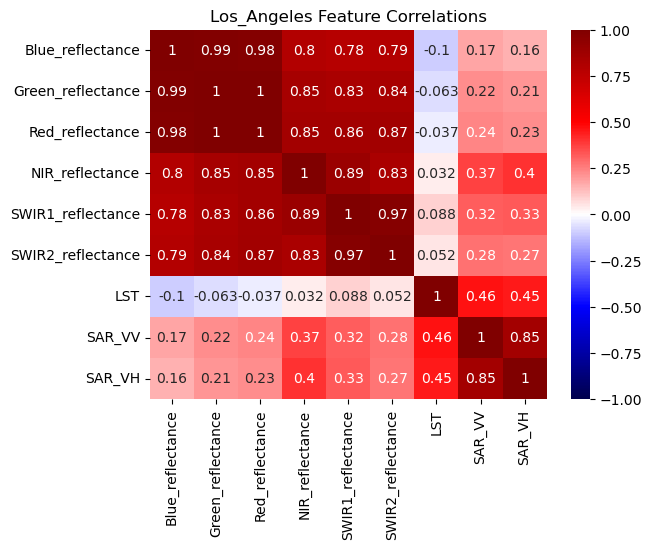

In [35]:
sns.heatmap(corr_matrix, xticklabels=vars, yticklabels=vars, annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title(f'{city} Feature Correlations')

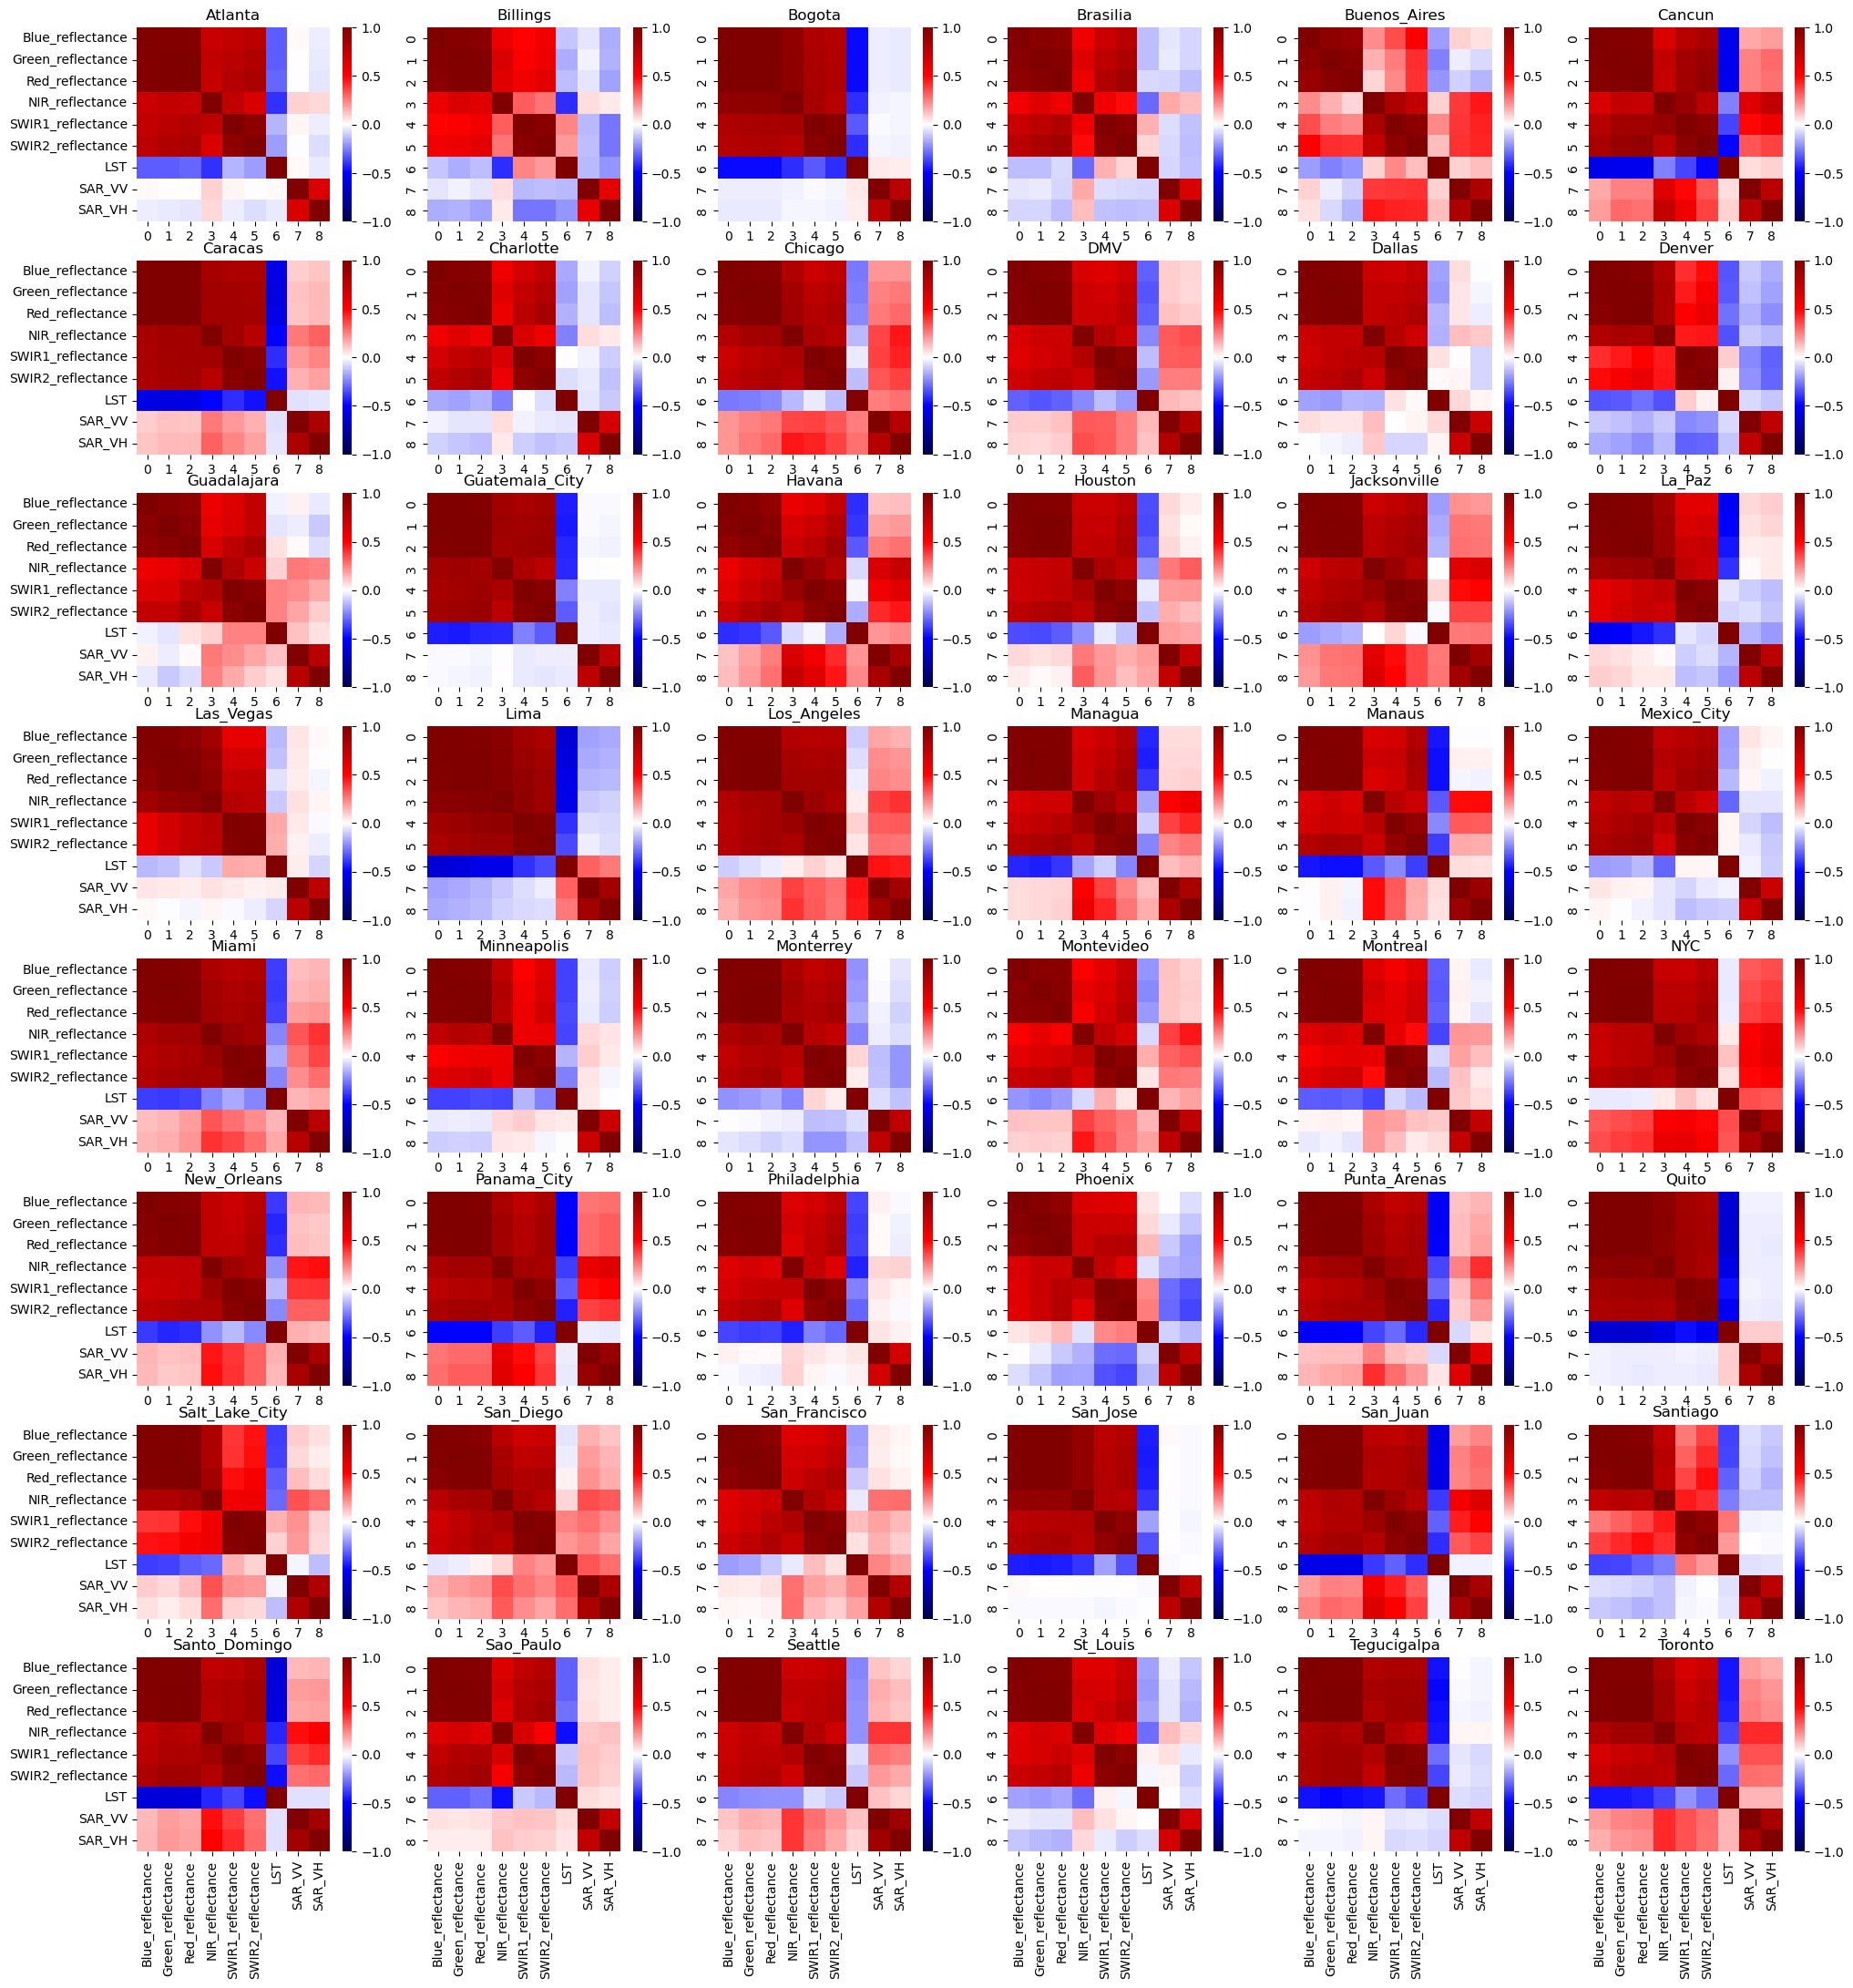

In [46]:
fig, axs = plt.subplots(8, 6)
fig.set_size_inches(24, 26)
#plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.subplots_adjust(hspace=0.2)

for i in range(8):
    for j in range(6):
        city = cities[i*6+j]
        with open(f'/glade/derecho/scratch/jstarfeldt/data_analysis/corr_matrices/{city}_corr_matrix.pkl', 'rb') as file:
            corr_matrix = pickle.load(file)
        if j == 0 and i == 7: # Label y axis for first plot of each row
            sns.heatmap(corr_matrix, xticklabels=vars, yticklabels=vars, annot=False, cmap='seismic', vmin=-1, vmax=1, ax=axs[i,j])
        elif i == 7: # Label x axis for last plot of each column
            sns.heatmap(corr_matrix, xticklabels=vars, annot=False, cmap='seismic', vmin=-1, vmax=1, ax=axs[i,j])
        elif j == 0:
            sns.heatmap(corr_matrix, yticklabels=vars, annot=False, cmap='seismic', vmin=-1, vmax=1, ax=axs[i,j])
        else:
            sns.heatmap(corr_matrix, annot=False, cmap='seismic', vmin=-1, vmax=1, ax=axs[i,j])
        axs[i,j].set_title(city)

## Spatial Variability

In [23]:
var_dict = {}

for city in cities:
    LST_vars = []
    city_list = sorted(glob.glob(f'{dataset_root}/{city}/processed_Landsat/*'))
    
    for file in city_list:
        arr = xr.open_dataset(file)['Landsat_LST'].values
        LST_vars.append(np.nanstd(arr))
        
    var_dict[city] = LST_vars

with open(f'/glade/derecho/scratch/jstarfeldt/data_analysis/LST_spatial_stds.pkl', 'wb') as file:
    pickle.dump(var_dict, file)

In [11]:
with open(f'/glade/derecho/scratch/jstarfeldt/data_analysis/LST_spatial_stds.pkl', 'rb') as file:
    var_dict = pickle.load(file)

Text(0.5, 1.0, 'Cancun Spatial Variability Timeline')

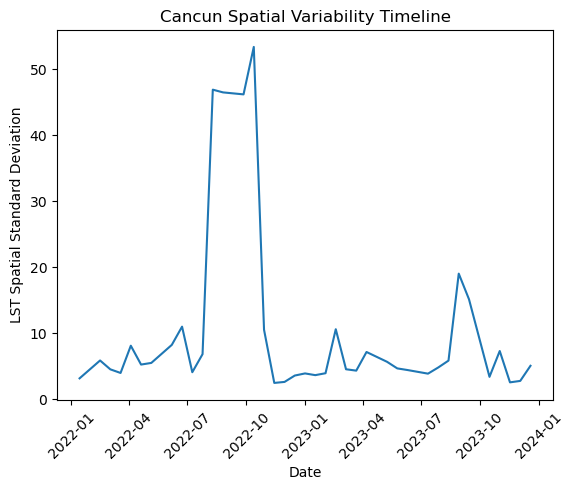

In [104]:
city = 'Cancun'

plt.plot(date_dict[city], var_dict[city])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('LST Spatial Standard Deviation')
plt.title(f'{city} Spatial Variability Timeline')

In [105]:
month_list = np.array([dt.month for dt in date_dict[city]])
var_list = np.array(var_dict[city])

In [106]:
DJF_vars = var_list[np.where(np.logical_or(month_list==12, month_list<3))]
MAM_vars = var_list[np.where(np.logical_and(month_list>=3, month_list<6))]
JJA_vars = var_list[np.where(np.logical_and(month_list>=6, month_list<9))]
SON_vars = var_list[np.where(np.logical_and(month_list>=9, month_list<12))]

In [102]:
def get_pdf(data):
    mean = np.nanmean(data)
    std_dev = np.nanstd(data)
    x = np.linspace(0, np.nanmax(data)+3, 1000)
    #x = np.linspace(0, 50, 1000)
    pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
    return x, pdf

/glade/derecho/scratch/jstarfeldt/tmp/ipykernel_107475/3505586439.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
/glade/derecho/scratch/jstarfeldt/tmp/ipykernel_107475/3505586439.py:6: RuntimeWarning: divide by zero encountered in divide
  pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
/glade/derecho/scratch/jstarfeldt/tmp/ipykernel_107475/3505586439.py:6: RuntimeWarning: invalid value encountered in multiply
  pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)


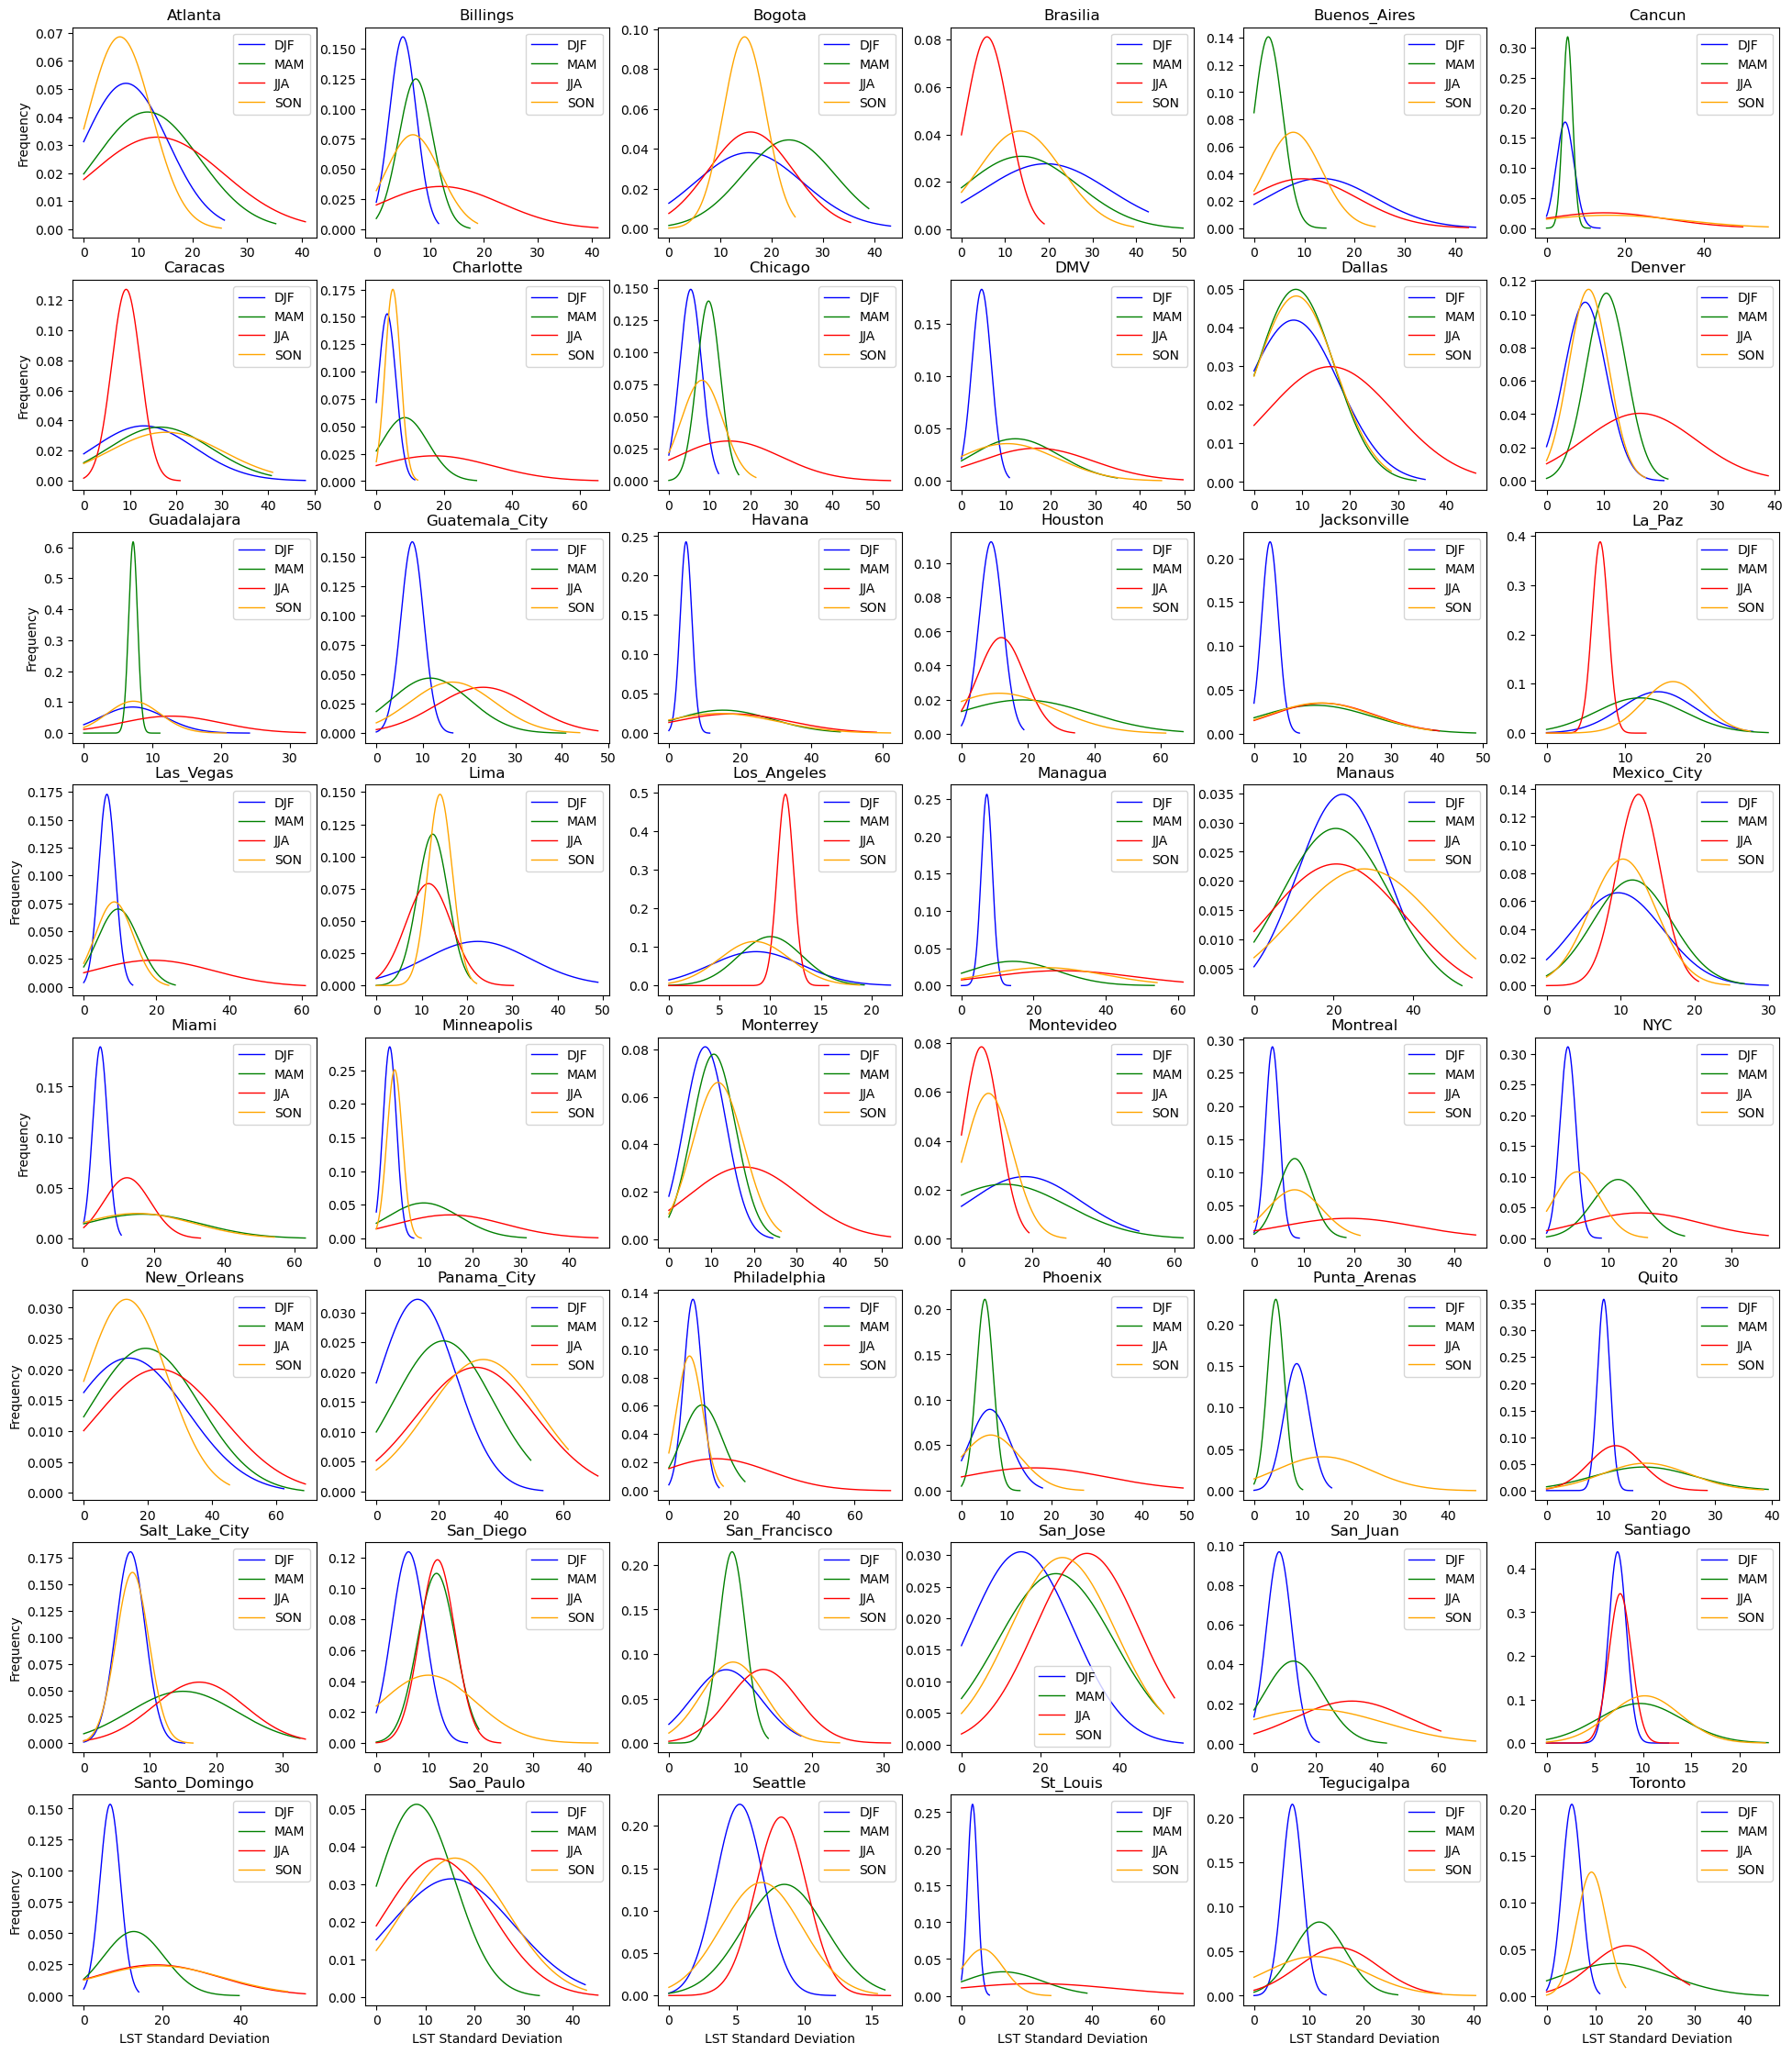

In [112]:
fig, axs = plt.subplots(8, 6)
fig.set_size_inches(24, 28)
#plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.subplots_adjust(hspace=0.2)

for i in range(8):
    for j in range(6):
        city = cities[i*6+j]
        month_list = np.array([dt.month for dt in date_dict[city]])
        var_list = np.array(var_dict[city])


        DJF_vars = var_list[np.where(np.logical_or(month_list==12, month_list<3))]
        MAM_vars = var_list[np.where(np.logical_and(month_list>=3, month_list<6))]
        JJA_vars = var_list[np.where(np.logical_and(month_list>=6, month_list<9))]
        SON_vars = var_list[np.where(np.logical_and(month_list>=9, month_list<12))]
        DJF_x, DJF_pdf = get_pdf(DJF_vars)
        MAM_x, MAM_pdf = get_pdf(MAM_vars)
        JJA_x, JJA_pdf = get_pdf(JJA_vars)
        SON_x, SON_pdf = get_pdf(SON_vars)

        axs[i,j].plot(DJF_x, DJF_pdf, color='b', linewidth=1, label='DJF')
        axs[i,j].plot(MAM_x, MAM_pdf, color='g', linewidth=1, label='MAM')
        axs[i,j].plot(JJA_x, JJA_pdf, color='r', linewidth=1, label='JJA')
        axs[i,j].plot(SON_x, SON_pdf, color='orange', linewidth=1, label='SON')
        axs[i,j].legend()
        axs[i,j].set_title(city)

        if j == 0:
            axs[i,j].set_ylabel('Frequency')
        if i == 7:
            axs[i,j].set_xlabel('LST Standard Deviation')
        

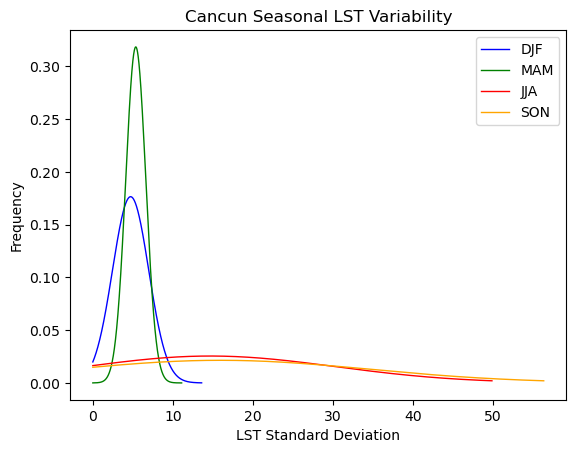

In [107]:
DJF_x, DJF_pdf = get_pdf(DJF_vars)
MAM_x, MAM_pdf = get_pdf(MAM_vars)
JJA_x, JJA_pdf = get_pdf(JJA_vars)
SON_x, SON_pdf = get_pdf(SON_vars)

# Plot the line
plt.plot(DJF_x, DJF_pdf, color='b', linewidth=1, label='DJF')
plt.plot(MAM_x, MAM_pdf, color='g', linewidth=1, label='MAM')
plt.plot(JJA_x, JJA_pdf, color='r', linewidth=1, label='JJA')
plt.plot(SON_x, SON_pdf, color='orange', linewidth=1, label='SON')

plt.xlabel('LST Standard Deviation')
plt.ylabel('Frequency')
plt.title(f'{city} Seasonal LST Variability')
plt.legend()